# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [16]:
# Herramientas de uso
import itertools

# Gemas del Infinito
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Adicionales
from matplotlib.ticker import ScalarFormatter

#Machine Learning


#NLP
import nltk

# Configuración NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Jean Piere
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jean Piere
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Metodología de trabajo

Aqui irá un resumen de lo desarrollado

## 1. Exploración

### 1.1 Espacio de trabajo

* **Dataset Dev**

In [2]:
dataset_dev = pd.read_json('dataset_amazon/dataset_es_dev.json', lines= True)
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


* **Dataset Train**

In [3]:
dataset_train = pd.read_json('dataset_amazon/dataset_es_train.json', lines= True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


* **Dataset Test**

In [4]:
dataset_test = pd.read_json('dataset_amazon/dataset_es_test.json', lines= True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


### 1.2 Exploración inicial

Número de instancias en el dataset:

In [5]:
dataset_dev.shape

(5000, 8)

In [6]:
dataset_train.shape

(200000, 8)

In [7]:
dataset_test.shape

(5000, 8)

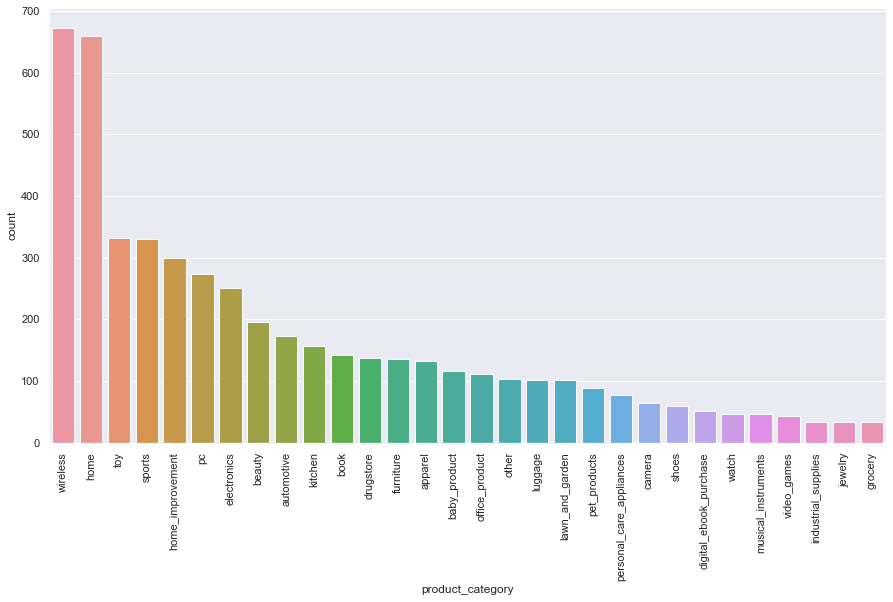

In [18]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=dataset_dev, x='product_category',order = dataset_dev.product_category.value_counts().index)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Se encuentra que la principal categoria de reseñas correspontes a wireless, home, toy, sports y home_improvement. Ahora buscaremos dividir el dataset según el número de estrellas y ubicar qué categorias son populares a partir de la calificación.

## 1.2 Exploracion por calificacion

#### Categorias populares con 1 estrella

In [21]:
one_star = dataset_dev[dataset_dev.stars==1]
one_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


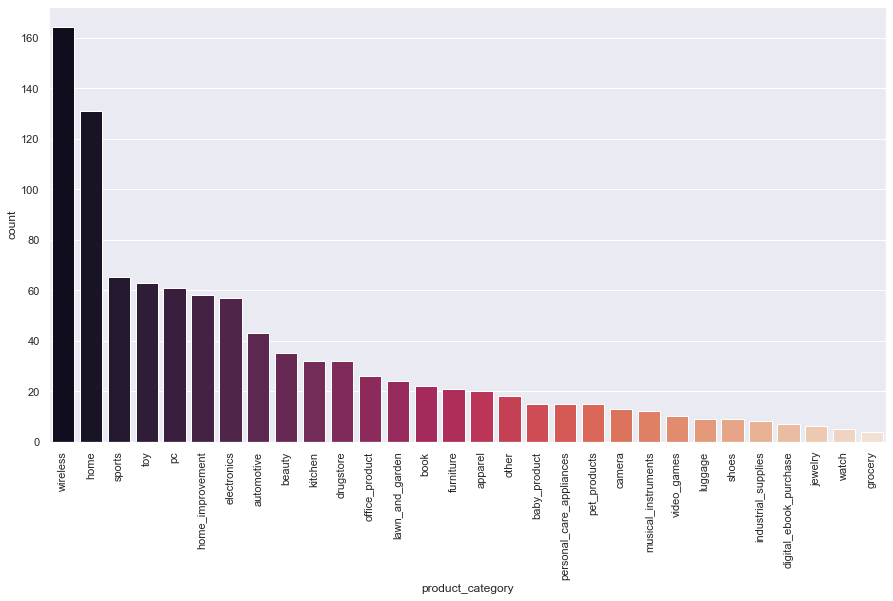

In [29]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=one_star, x='product_category',order = one_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 2 estrella

In [22]:
two_star = dataset_dev[dataset_dev.stars==2]
two_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
1000,es_0118732,product_es_0968323,reviewer_es_0145809,2,Me han enviado algo completamente diferente. E...,Muy mal,es,home
1001,es_0696968,product_es_0860895,reviewer_es_0999762,2,En menos de 2 semanas de uso una de las mangas...,Baja calidad de producto,es,kitchen
1002,es_0874902,product_es_0170859,reviewer_es_0981966,2,"Hicimos el pedido de la barrera, hasta ahí tod...",Decepcionados con el embalaje y el estado del ...,es,baby_product
1003,es_0773654,product_es_0429247,reviewer_es_0191603,2,Queda grande no es una S pero se puede arregla...,Mas o menos,es,apparel
1004,es_0532571,product_es_0293429,reviewer_es_0799746,2,En 5 días de uso se ha roto el pulsador de pue...,Poca calidad,es,home_improvement


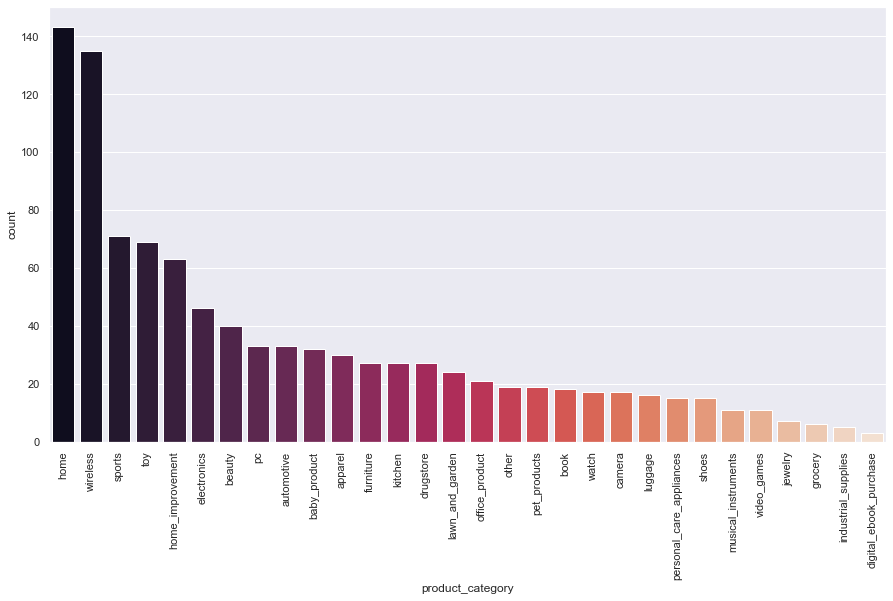

In [30]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=two_star, x='product_category',order = two_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 3 estrella

In [23]:
three_star = dataset_dev[dataset_dev.stars==3]
three_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
2000,es_0176929,product_es_0553307,reviewer_es_0240217,3,"Nos gusto por su color, tejido y calidad de es...",Encaja,es,lawn_and_garden
2001,es_0032372,product_es_0720285,reviewer_es_0348916,3,"Ha llegado rápido. , Es más pequeña de lo que ...",Simple.,es,luggage
2002,es_0446630,product_es_0413759,reviewer_es_0118864,3,Me ha gustado el producto,Buen producto,es,watch
2003,es_0001452,product_es_0619908,reviewer_es_0037222,3,"se despega rápido, lo que he hecho ha sido coc...",bien,es,kitchen
2004,es_0315490,product_es_0435465,reviewer_es_0988902,3,no parece tampoco muy especifico para animales...,BASICO,es,drugstore


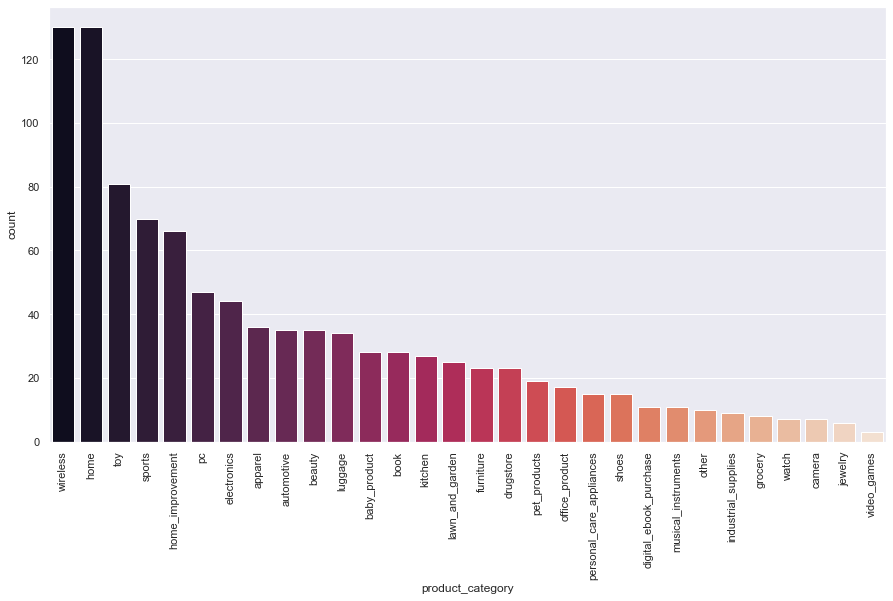

In [31]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=three_star, x='product_category',order = three_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 4 estrella

In [24]:
four_star = dataset_dev[dataset_dev.stars==4]
four_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
3000,es_0638126,product_es_0921838,reviewer_es_0467790,4,Son robustas y francamente cumplen con su come...,Gran juego de llaves.,es,home_improvement
3001,es_0957542,product_es_0016810,reviewer_es_0205107,4,Estupenda relación calidad-precio,Funcional,es,home_improvement
3002,es_0571992,product_es_0161938,reviewer_es_0304170,4,Lo compré para mi madre. Esta muy contenta. Es...,compacto y cómodo,es,furniture
3003,es_0469900,product_es_0182832,reviewer_es_0562273,4,"UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...",ESTA BIEN,es,home_improvement
3004,es_0832100,product_es_0922601,reviewer_es_0049840,4,Le doy cuatro estrellas porque aún no lo he pr...,Nice.,es,wireless


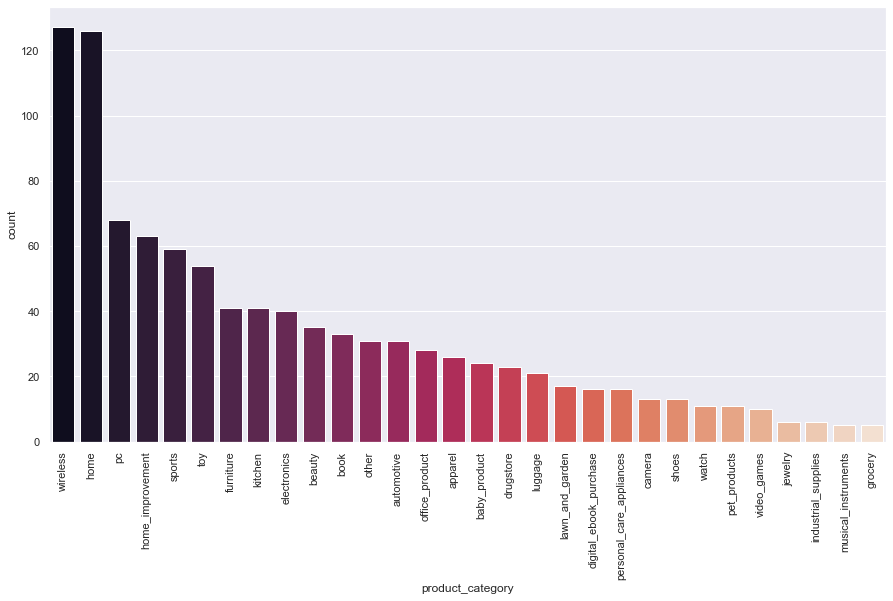

In [32]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=four_star, x='product_category',order = four_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

#### Categorias populares con 5 estrella

In [27]:
five_star = dataset_dev[dataset_dev.stars==5]
five_star.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
4000,es_0973261,product_es_0163826,reviewer_es_0461590,5,"Mi pareja encantada con esta adquisición, prác...","Muy Útil, ligero y hace su papel para lo que es",es,toy
4001,es_0285657,product_es_0396230,reviewer_es_0837511,5,En cuanto lo compré mi gato se olvidó de rasca...,Funciona,es,pet_products
4002,es_0777148,product_es_0566248,reviewer_es_0269131,5,Café de excelente calidad. Las cápsulas sin al...,Cápsulas compatibles con maquina nespresso rec...,es,grocery
4003,es_0554747,product_es_0244949,reviewer_es_0800916,5,Te atrapa desde el primer minuto!!! Lectura fá...,Te atrapa,es,digital_ebook_purchase
4004,es_0685602,product_es_0991354,reviewer_es_0579306,5,"Está muy bien montado, y resulta muy vistoso. ...",que sea lo pedido,es,jewelry


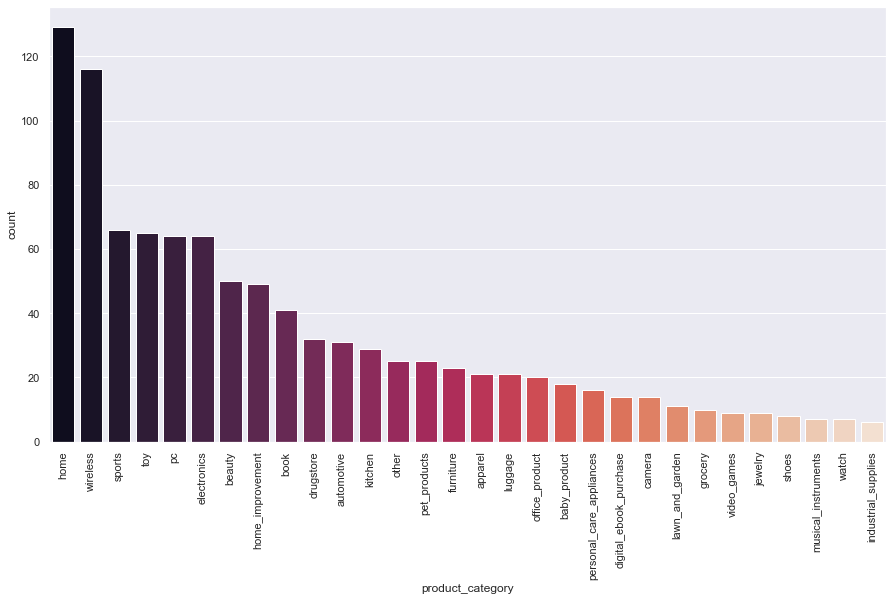

In [33]:
plt.figure(figsize = (15,8))
plot = sns.countplot(data=five_star, x='product_category',order = five_star.product_category.value_counts().index,palette='rocket')
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Observamos que sin distincion a la clasificacion, las categorias parecen seguir el mismo comportamiento. 

Este comportamiento nos indica que el numero de estrellas no esta muy relacionado a la categoria de un producto. Esto es, productos de x o y categoria no se distinguen por su alto/bajo calificacion.

## 2. Analisis exploratorio de reviews y title reviews

## 2.1 Exploracion de title Review

In [37]:
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [48]:
dataset_dev.language.value_counts()

es    5000
Name: language, dtype: int64

In [49]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [50]:
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [72]:
title_reviews = []
calification = []
for i in range(dataset_dev.shape[0]):
    title = dataset_dev.iloc[i].review_title.lower()
    star = dataset_dev.iloc[i].stars
    title = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(title)
    title = [word for word in title if word not in stopwords]

    title_reviews.append(title)
    calification.append(star)

In [79]:
calification

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [73]:
title_reviews

[['mala', 'compra'],
 ['recibido'],
 ['aprieta', 'bien', 'manillar'],
 ['brocas', 'mantequilla'],
 ['gusta'],
 ['bolas', 'rotas'],
 ['parte', 'poder', 'elegir', 'color'],
 ['tapa', 'pantalla'],
 ['recibido', 'producto'],
 ['patata'],
 ['desliza', 'hacia', 'abajo', 'rato'],
 ['comprar'],
 ['recoge'],
 ['sirve'],
 ['endeble'],
 ['nunca', 'entregaron', 'juegos'],
 ['malo'],
 ['bolsitas'],
 ['llegado'],
 ['recomiendo'],
 ['coronas'],
 ['resistente'],
 ['mamá'],
 ['embalaje', 'directamente', 'caja'],
 ['malisimo'],
 ['estafa'],
 ['material', 'poca', 'calidad'],
 ['cubierta', 'asiento'],
 ['funciona'],
 ['difícil', 'limpiar'],
 ['deja', 'funcionar'],
 ['pequeños'],
 ['exploto', 'nunca', 'repusieron'],
 ['mala', 'calidad'],
 ['mala', 'calidad'],
 ['alimentador', 'soporte'],
 ['van', 'conos'],
 ['recibido', 'paquete'],
 ['paga', 'devoluciones'],
 ['producto', 'averiado'],
 ['funcionado', 'primer', 'momento'],
 [],
 ['endeble'],
 ['volvere', 'comprar'],
 ['producto', 'usado', 'incompleto'],
 ['

In [74]:
title_reviews = list(itertools.chain(*title_reviews))
title_reviews[0:12]

['mala',
 'compra',
 'recibido',
 'aprieta',
 'bien',
 'manillar',
 'brocas',
 'mantequilla',
 'gusta',
 'bolas',
 'rotas',
 'parte']

In [75]:
freq_tl = nltk.FreqDist(title_reviews)
freq_tl

FreqDist({'calidad': 401, 'bien': 309, 'buena': 237, 'precio': 230, 'producto': 190, 'buen': 189, 'mal': 108, 'mala': 104, 'perfecto': 102, 'bueno': 85, ...})

In [77]:
df_tl = pd.DataFrame(list(freq_tl.items()), columns = ["Word","W_Frequency"])
df_tl.head()

,Word,W_Frequency
0,mala,104
1,compra,83
2,recibido,18
3,aprieta,1
4,bien,309


In [78]:
df_tl.sort_values('W_Frequency',ascending=False, inplace = True)
df_tl.head()

,Word,W_Frequency
44,calidad,401
4,bien,309
273,buena,237
503,precio,230
17,producto,190


In [80]:
df_tl.reset_index(drop = True, inplace=True)
df_tl.head()

,Word,W_Frequency
0,calidad,401
1,bien,309
2,buena,237
3,precio,230
4,producto,190


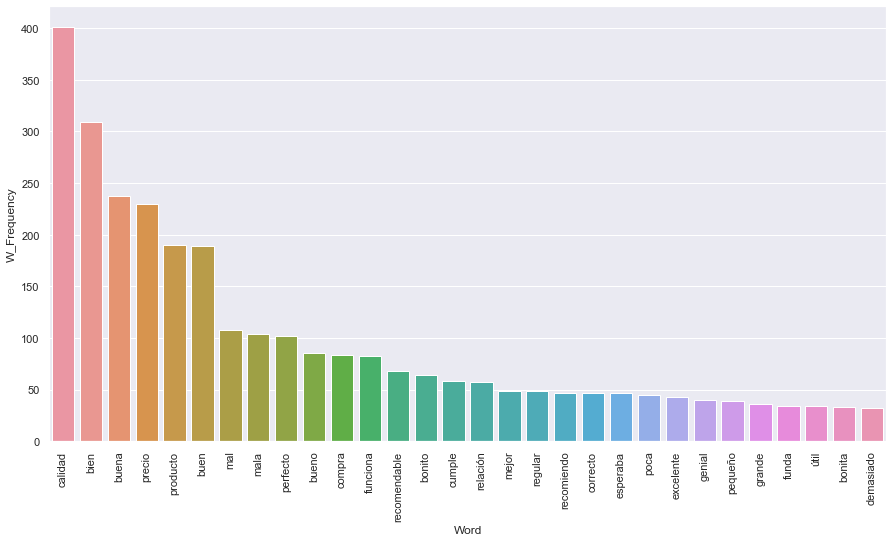

In [83]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_tl.iloc[:30].Word, y = df_tl.iloc[:30].W_Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()